In [1]:
%matplotlib inline 


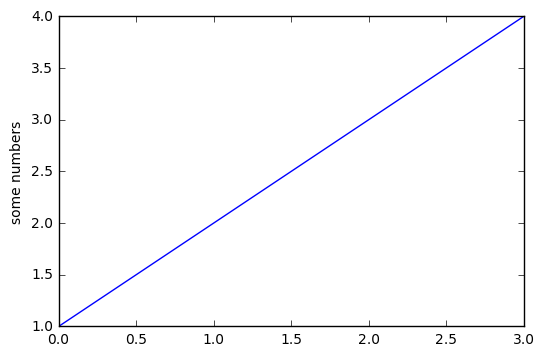

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [18]:
import time 
def plot_lloyds(datapoints, centroids):

    dp_X1s = []
    dp_X2s = []
    for datapoint in datapoints:
        dp_X1s.append(datapoint[0])
        dp_X2s.append(datapoint[1])
    c_X1s =[]
    c_X2s =[]
    for centroid in centroids:
        c_X1s.append(centroid[0])
        c_X2s.append(centroid[1])        
        
    print dp_X1s, '\n', dp_X2s    
    plt.plot(dp_X1s, dp_X2s, 'ro')    
    plt.plot(c_X1s,  c_X2s, 'bs')
    #plt.axis([-6, 6, -6, 6])
    plt.axis([-1, 1, -1, 1])
    plt.show()
    time.sleep(1)

In [33]:
def squared_euclidian_distance(datapoint1, datapoint2):
    return np.power((datapoint1[0] - datapoint2[0]), 2.0) + np.power((datapoint1[1] - datapoint2[1]), 2.0)


def find_centroid(cluster):
    if len(cluster) == 0:
        return None
    s = len(cluster)
    dimensions = len(cluster[0])
    centroid = [0.0]*dimensions
    for datapoint in cluster:
        for i in range(dimensions):
            centroid[i] += datapoint[i]
    centroid = np.array(centroid)
    return centroid/float(s)


def check_if_points_are_same(datapoint1, datapoint2):
    is_close = np.isclose(datapoint1, datapoint2)
    for val in is_close:
        if not val:
            return False
    return True


def lloyds_clustering(datapoints, mus):

    centroids_num = len(mus)
    centroids = np.array(mus)

    centroids_changed = True
    iteration_limit = 1000
    iteration = 0
    while centroids_changed or iteration >= iteration_limit:
        #clusters = [[]] * centroids_num
        plot_lloyds(datapoints, centroids)
        #print datapoints
        print "Centroids:", centroids
        clusters = {}
        for datapoint in datapoints:
            distances = []
            for centroid in centroids:
                distances.append(squared_euclidian_distance(datapoint, centroid))
            #print distances
            id = distances.index(min(distances))
            idx = str(id)
            #print idx, type(idx)
            if idx in clusters:
                clusters[idx].append(datapoint)
            else:
                clusters[idx] = [datapoint]
            #print "clusters: \n", clusters
        new_centroids = []
        if len(clusters) < centroids_num:
            print "[WARNING] empty clusters!!!"
            return None
        changed_in_iteration = []
        for i in range(len(clusters)):
            new_centroid = find_centroid(clusters[str(i)])
            #print i, new_centroid            
            new_centroids.append(new_centroid)
            print "Centroids changed in iter: ", changed_in_iteration
            changed_in_iteration.append(not check_if_points_are_same(new_centroid, centroids[i]))
        print "New_centroids:", new_centroids

        
        centroids_changed = (np.array(changed_in_iteration).any() == True)
        print "Centroids changed: ", centroids_changed
        centroids = new_centroids
        iteration+=1

    return centroids, iteration


In [5]:
import numpy as np 
def generate_dataset(N): 
    np.random.seed(323)
    dataset = []
    x1_set = np.random.uniform(-1, 1, size=N)
    x2_set = np.random.uniform(-1, 1, size=N)
    for i in range(N): 
        dataset.append([x1_set[i], x2_set[i]])
    return dataset

started lloyds clustering
[-3.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0] 
[2.0, -1.0, 3.0, 2.0, -3.0, 5.0, 5.0]


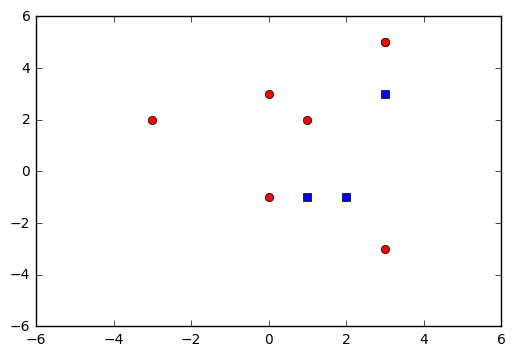

[[-3.0, 2.0], [0.0, -1.0], [0.0, 3.0], [1.0, 2.0], [3.0, -3.0], [3.0, 5.0], [3.0, 5.0]]
[[ 1. -1.]
 [ 3.  3.]
 [ 2. -1.]]
New_centroids: [array([-1.5,  0.5]), array([ 1.75,  3.75]), array([ 3., -3.])]
[-3.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0] 
[2.0, -1.0, 3.0, 2.0, -3.0, 5.0, 5.0]


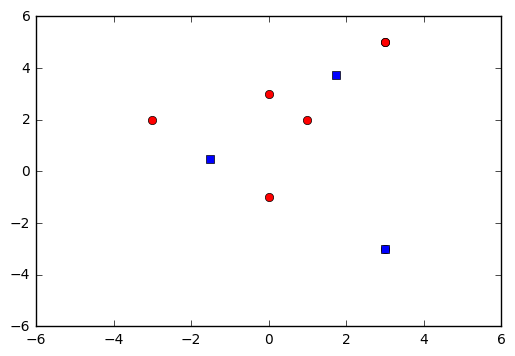

[[-3.0, 2.0], [0.0, -1.0], [0.0, 3.0], [1.0, 2.0], [3.0, -3.0], [3.0, 5.0], [3.0, 5.0]]
[array([-1.5,  0.5]), array([ 1.75,  3.75]), array([ 3., -3.])]
New_centroids: [array([-1.5,  0.5]), array([ 1.75,  3.75]), array([ 3., -3.])]
ended lloyds clustering


In [19]:
#datapoints = gen.generate_dataset(N)
#mus = gen.generate_dataset(K)
datapoints = [[-3.0, 2.0],
[0.0, -1.0],
[0.0, 3.0],
[1.0, 2.0],
[3.0, -3.0],
[3.0, 5.0],
[3.0, 5.0]]

mus = [[1.0, -1.0], [3.0, 3.0], [2.0, -1.0]]

print "started lloyds clustering"
lloyds_clustering(datapoints, mus)
print "ended lloyds clustering"

In [20]:
def plot_lloyds(datapoints, centroids):

    for datapoint in datapoints:
        plt.plot(datapoint[0], datapoint[1], 'ro')
    for centroid in centroids:
        plt.plot(centroid[0], centroid[1], 'bs')
    plt.axis([-1, 1, -1, 1])
    plt.show()
    time.sleep(1)

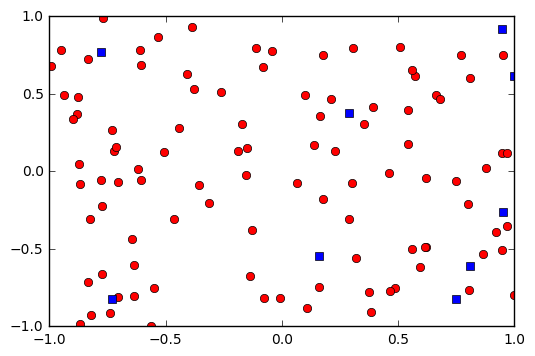

Centroids: [[ 0.94677695  0.92192809]
 [-0.77930639  0.77206948]
 [ 0.80769964 -0.61048493]
 [ 0.75096116 -0.82446295]
 [ 0.95198848 -0.26054936]
 [ 0.1578989  -0.54781461]
 [ 0.99797842  0.61875804]
 [ 0.2881274   0.37578735]
 [-0.72846675 -0.82101229]]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, True]
Centroids changed in iter:  [True, True, True]
Centroids changed in iter:  [True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True, True, True, True]
New_centroids: [array([ 0.64108439,  0.77706634]), array([-0.69816632,  0.49142842]), array([ 0.70058862, -0.52213162]), array([ 0.62712816, -0.79850779]), array([ 0.85692217, -0.09992765]), array([ 0.03613646, -0.50018674]), array([ 0.77519647,  0.57837763]), array

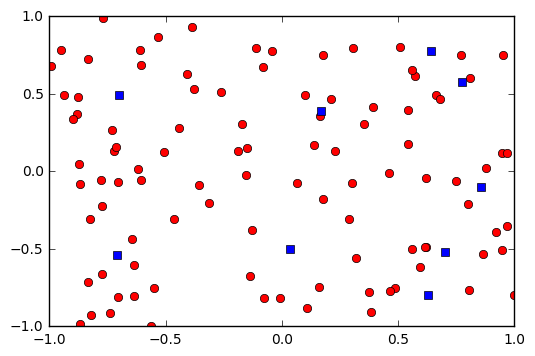

Centroids: [array([ 0.64108439,  0.77706634]), array([-0.69816632,  0.49142842]), array([ 0.70058862, -0.52213162]), array([ 0.62712816, -0.79850779]), array([ 0.85692217, -0.09992765]), array([ 0.03613646, -0.50018674]), array([ 0.77519647,  0.57837763]), array([ 0.16913759,  0.39037867]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, True]
Centroids changed in iter:  [True, True, True]
Centroids changed in iter:  [True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True, True, True, True]
New_centroids: [array([ 0.54443682,  0.72529405]), array([-0.67827464,  0.49240424]), array([ 0.73220854, -0.50337469]), array([ 0.58523802, -0.79486164]), array([ 0.77101068, -0.02681992]), arr

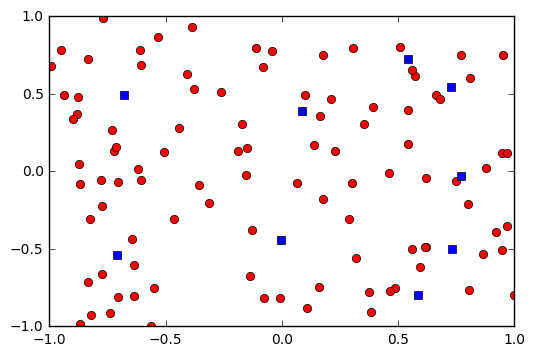

Centroids: [array([ 0.54443682,  0.72529405]), array([-0.67827464,  0.49240424]), array([ 0.73220854, -0.50337469]), array([ 0.58523802, -0.79486164]), array([ 0.77101068, -0.02681992]), array([-0.00460057, -0.44237851]), array([ 0.72870213,  0.54192818]), array([ 0.08774141,  0.39035068]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, True]
Centroids changed in iter:  [True, True, True]
Centroids changed in iter:  [True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True]
Centroids changed in iter:  [True, True, True, True, True, False]
Centroids changed in iter:  [True, True, True, True, True, False, True]
Centroids changed in iter:  [True, True, True, True, True, False, True, True]
New_centroids: [array([ 0.42550083,  0.72568059]), array([-0.69816632,  0.49142842]), array([ 0.81202744, -0.50692322]), array([ 0.5180678 , -0.76529389]), array([ 0.69685072,  0.00440397]), 

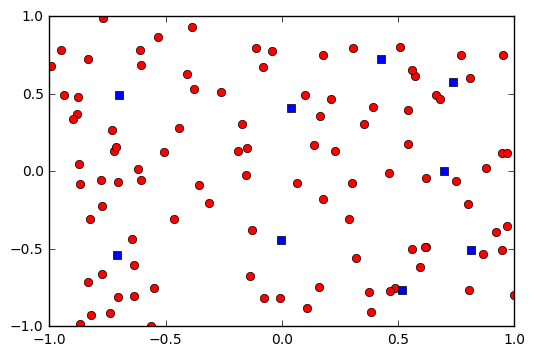

Centroids: [array([ 0.42550083,  0.72568059]), array([-0.69816632,  0.49142842]), array([ 0.81202744, -0.50692322]), array([ 0.5180678 , -0.76529389]), array([ 0.69685072,  0.00440397]), array([-0.00460057, -0.44237851]), array([ 0.73593002,  0.57630643]), array([ 0.04127739,  0.40652625]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, False]
Centroids changed in iter:  [True, False, True]
Centroids changed in iter:  [True, False, True, True]
Centroids changed in iter:  [True, False, True, True, False]
Centroids changed in iter:  [True, False, True, True, False, True]
Centroids changed in iter:  [True, False, True, True, False, True, True]
Centroids changed in iter:  [True, False, True, True, False, True, True, True]
New_centroids: [array([ 0.38880165,  0.68531523]), array([-0.69816632,  0.49142842]), array([ 0.8113785 , -0.53534581]), array([ 0.3895443 , -0.75274162]), array([ 0.69685072,  0.0044

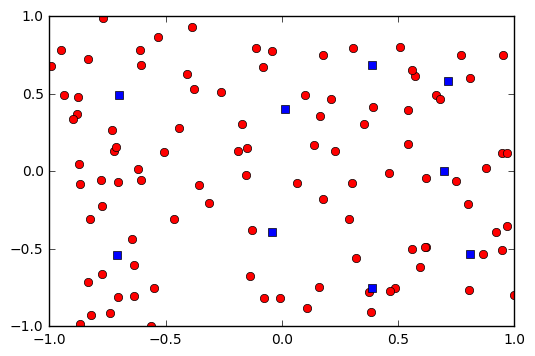

Centroids: [array([ 0.38880165,  0.68531523]), array([-0.69816632,  0.49142842]), array([ 0.8113785 , -0.53534581]), array([ 0.3895443 , -0.75274162]), array([ 0.69685072,  0.00440397]), array([-0.04403615, -0.39188782]), array([ 0.71278218,  0.58205032]), array([ 0.01442186,  0.40589852]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, False]
Centroids changed in iter:  [True, False, True]
Centroids changed in iter:  [True, False, True, True]
Centroids changed in iter:  [True, False, True, True, False]
Centroids changed in iter:  [True, False, True, True, False, True]
Centroids changed in iter:  [True, False, True, True, False, True, True]
Centroids changed in iter:  [True, False, True, True, False, True, True, False]
New_centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.28540618, -0.77636736]), array([ 0.69685072,  0.004

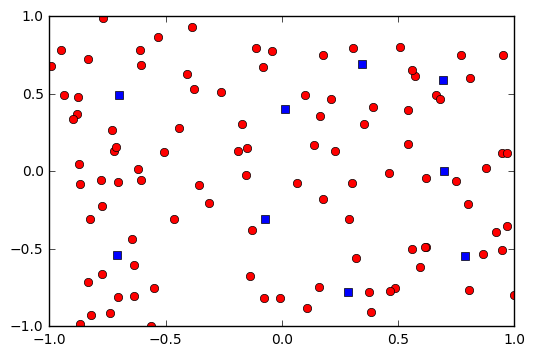

Centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.28540618, -0.77636736]), array([ 0.69685072,  0.00440397]), array([-0.07064378, -0.30556824]), array([ 0.69390956,  0.59133052]), array([ 0.01442186,  0.40589852]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, False]
Centroids changed in iter:  [False, False, False]
Centroids changed in iter:  [False, False, False, True]
Centroids changed in iter:  [False, False, False, True, False]
Centroids changed in iter:  [False, False, False, True, False, True]
Centroids changed in iter:  [False, False, False, True, False, True, False]
Centroids changed in iter:  [False, False, False, True, False, True, False, False]
New_centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.2453697 , -0.78102155]), array([ 0.

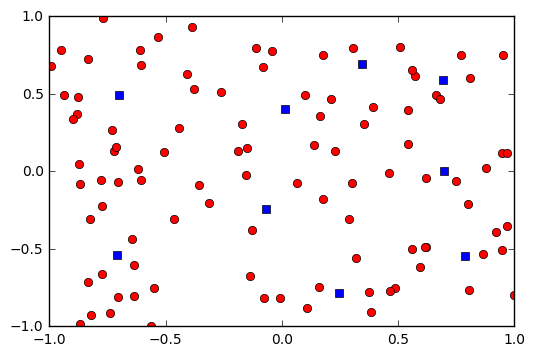

Centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.2453697 , -0.78102155]), array([ 0.69685072,  0.00440397]), array([-0.07010899, -0.24148239]), array([ 0.69390956,  0.59133052]), array([ 0.01442186,  0.40589852]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, False]
Centroids changed in iter:  [False, False, False]
Centroids changed in iter:  [False, False, False, True]
Centroids changed in iter:  [False, False, False, True, False]
Centroids changed in iter:  [False, False, False, True, False, True]
Centroids changed in iter:  [False, False, False, True, False, True, False]
Centroids changed in iter:  [False, False, False, True, False, True, False, False]
New_centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.

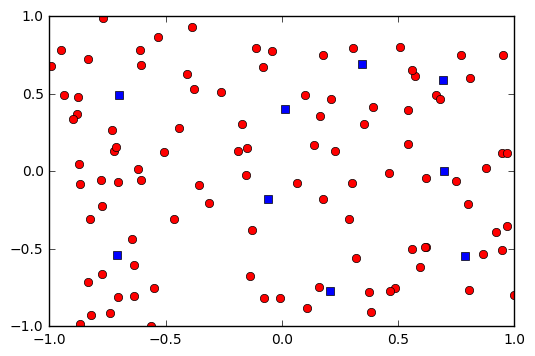

Centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.69685072,  0.00440397]), array([-0.06031974, -0.17970203]), array([ 0.69390956,  0.59133052]), array([ 0.01442186,  0.40589852]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, False]
Centroids changed in iter:  [False, False, False]
Centroids changed in iter:  [False, False, False, False]
Centroids changed in iter:  [False, False, False, False, True]
Centroids changed in iter:  [False, False, False, False, True, True]
Centroids changed in iter:  [False, False, False, False, True, True, False]
Centroids changed in iter:  [False, False, False, False, True, True, False, True]
New_centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.

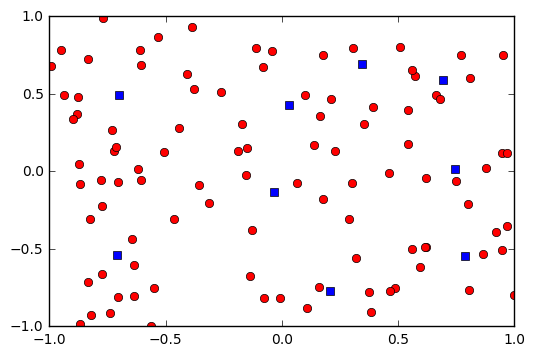

Centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.03434557, -0.13305994]), array([ 0.69390956,  0.59133052]), array([ 0.03122124,  0.42858039]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, False]
Centroids changed in iter:  [False, False, False]
Centroids changed in iter:  [False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False, True]
Centroids changed in iter:  [False, False, False, False, False, True, False]
Centroids changed in iter:  [False, False, False, False, False, True, False, True]
New_centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array(

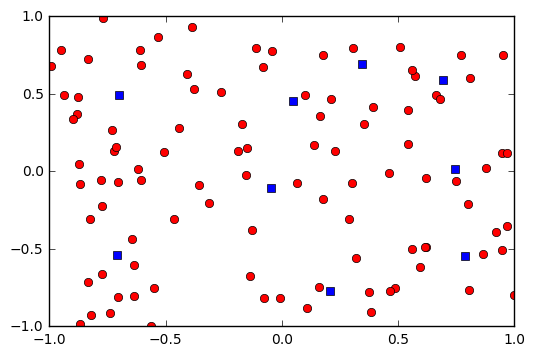

Centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.04599921, -0.10479754]), array([ 0.69390956,  0.59133052]), array([ 0.04777609,  0.45394551]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, False]
Centroids changed in iter:  [False, False, False]
Centroids changed in iter:  [False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False, True]
Centroids changed in iter:  [False, False, False, False, False, True, False]
Centroids changed in iter:  [False, False, False, False, False, True, False, True]
New_centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array(

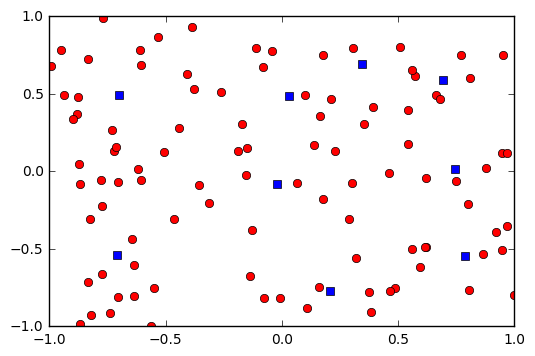

Centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02105802, -0.08351471]), array([ 0.69390956,  0.59133052]), array([ 0.02971831,  0.4864087 ]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, False]
Centroids changed in iter:  [False, False, False]
Centroids changed in iter:  [False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False, True]
Centroids changed in iter:  [False, False, False, False, False, True, False]
Centroids changed in iter:  [False, False, False, False, False, True, False, True]
New_centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array(

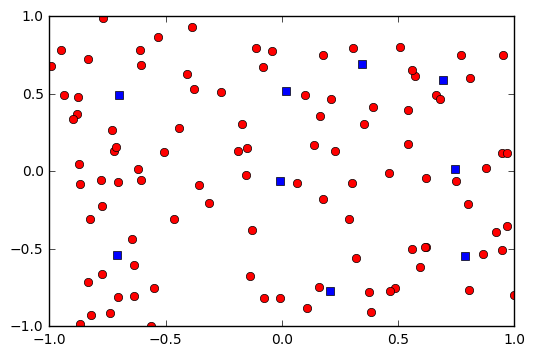

Centroids: [array([ 0.34555175,  0.69257106]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.00783584, -0.06214907]), array([ 0.69390956,  0.59133052]), array([ 0.01773054,  0.52124599]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, False]
Centroids changed in iter:  [True, False, False]
Centroids changed in iter:  [True, False, False, False]
Centroids changed in iter:  [True, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False, False, True]
New_centroids: [array([ 0.34692334,  0.61562656]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.7

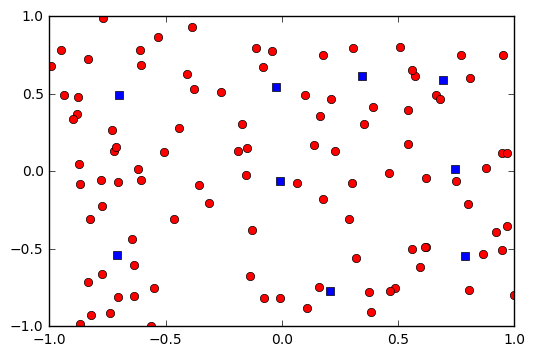

Centroids: [array([ 0.34692334,  0.61562656]), array([-0.69816632,  0.49142842]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.00783584, -0.06214907]), array([ 0.69390956,  0.59133052]), array([-0.02410436,  0.54792067]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, True]
Centroids changed in iter:  [True, True, False]
Centroids changed in iter:  [True, True, False, False]
Centroids changed in iter:  [True, True, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False, False, True]
New_centroids: [array([ 0.32438435,  0.59045229]), array([-0.71372445,  0.46929288]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972

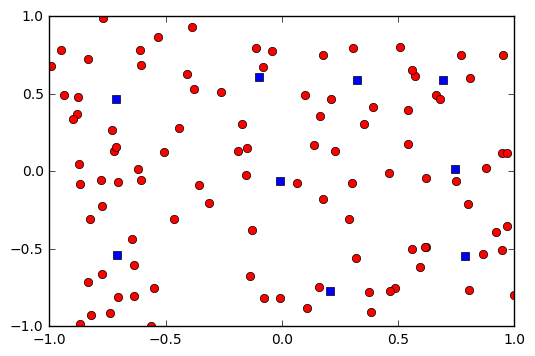

Centroids: [array([ 0.32438435,  0.59045229]), array([-0.71372445,  0.46929288]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.00783584, -0.06214907]), array([ 0.69390956,  0.59133052]), array([-0.098941  ,  0.60661546]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, True]
Centroids changed in iter:  [True, True, False]
Centroids changed in iter:  [True, True, False, False]
Centroids changed in iter:  [True, True, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False, True]
Centroids changed in iter:  [True, True, False, False, False, False, True, True]
New_centroids: [array([ 0.26690777,  0.51580721]), array([-0.74928446,  0.45714134]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972, 

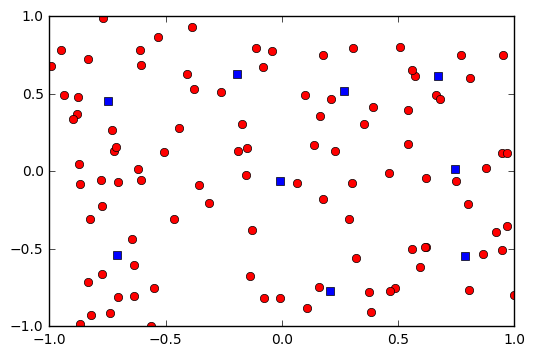

Centroids: [array([ 0.26690777,  0.51580721]), array([-0.74928446,  0.45714134]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.00783584, -0.06214907]), array([ 0.6734862 ,  0.61517546]), array([-0.19379296,  0.62801919]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, True]
Centroids changed in iter:  [True, True, False]
Centroids changed in iter:  [True, True, False, False]
Centroids changed in iter:  [True, True, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False, False, True]
New_centroids: [array([ 0.24278546,  0.51290525]), array([-0.76199791,  0.43296807]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972

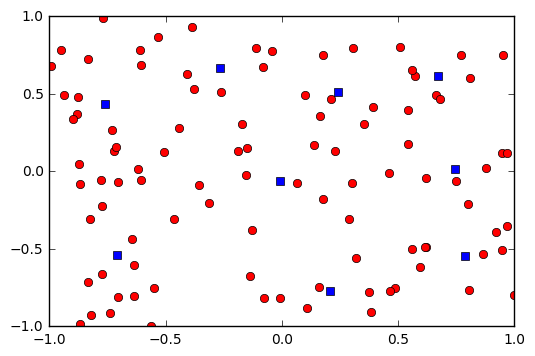

Centroids: [array([ 0.24278546,  0.51290525]), array([-0.76199791,  0.43296807]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.00783584, -0.06214907]), array([ 0.6734862 ,  0.61517546]), array([-0.26392711,  0.66941845]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, True]
Centroids changed in iter:  [False, True, False]
Centroids changed in iter:  [False, True, False, False]
Centroids changed in iter:  [False, True, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False, True]
New_centroids: [array([ 0.24278546,  0.51290525]), array([-0.77146747,  0.41125703]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.

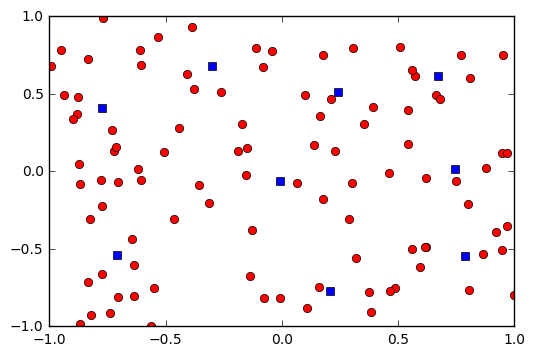

Centroids: [array([ 0.24278546,  0.51290525]), array([-0.77146747,  0.41125703]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.00783584, -0.06214907]), array([ 0.6734862 ,  0.61517546]), array([-0.29858289,  0.68051107]), array([-0.71002061, -0.53837875])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, True]
Centroids changed in iter:  [False, True, False]
Centroids changed in iter:  [False, True, False, False]
Centroids changed in iter:  [False, True, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False, True]
New_centroids: [array([ 0.24278546,  0.51290525]), array([-0.78303564,  0.32290814]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.

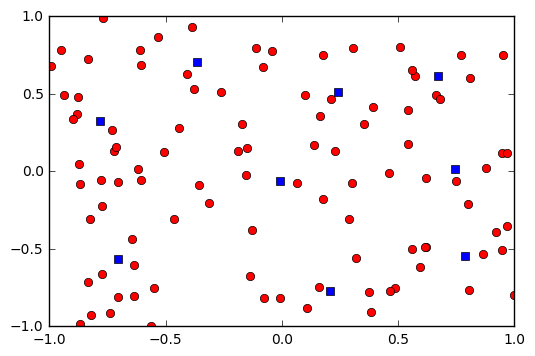

Centroids: [array([ 0.24278546,  0.51290525]), array([-0.78303564,  0.32290814]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.00783584, -0.06214907]), array([ 0.6734862 ,  0.61517546]), array([-0.36359002,  0.70695232]), array([-0.70594497, -0.56662612])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, True]
Centroids changed in iter:  [False, True, False]
Centroids changed in iter:  [False, True, False, False]
Centroids changed in iter:  [False, True, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, True]
Centroids changed in iter:  [False, True, False, False, False, True, False]
Centroids changed in iter:  [False, True, False, False, False, True, False, True]
New_centroids: [array([ 0.24278546,  0.51290525]), array([-0.77337764,  0.2577822 ]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.746

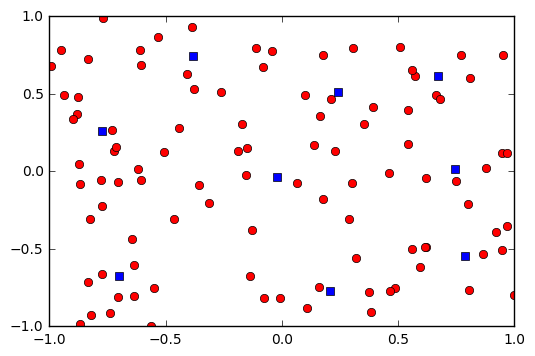

Centroids: [array([ 0.24278546,  0.51290525]), array([-0.77337764,  0.2577822 ]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.38099093,  0.74339318]), array([-0.70184297, -0.67350725])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, True]
Centroids changed in iter:  [False, True, False]
Centroids changed in iter:  [False, True, False, False]
Centroids changed in iter:  [False, True, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False, True]
New_centroids: [array([ 0.24278546,  0.51290525]), array([-0.76989586,  0.23017397]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.

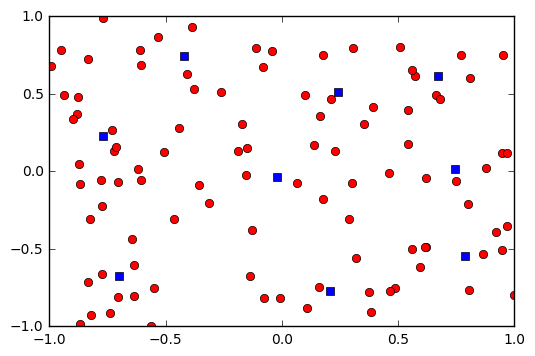

Centroids: [array([ 0.24278546,  0.51290525]), array([-0.76989586,  0.23017397]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.41862234,  0.74203726]), array([-0.70184297, -0.67350725])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, True]
Centroids changed in iter:  [False, True, False]
Centroids changed in iter:  [False, True, False, False]
Centroids changed in iter:  [False, True, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False, True]
New_centroids: [array([ 0.24278546,  0.51290525]), array([-0.75944694,  0.1710805 ]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.

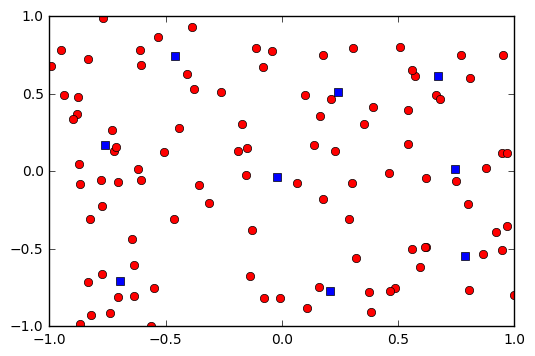

Centroids: [array([ 0.24278546,  0.51290525]), array([-0.75944694,  0.1710805 ]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.45946491,  0.74518709]), array([-0.69645058, -0.70826905])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, True]
Centroids changed in iter:  [True, True, False]
Centroids changed in iter:  [True, True, False, False]
Centroids changed in iter:  [True, True, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False, False]
Centroids changed in iter:  [True, True, False, False, False, False, False, True]
New_centroids: [array([ 0.1752022 ,  0.55987904]), array([-0.744736  ,  0.13922641]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972

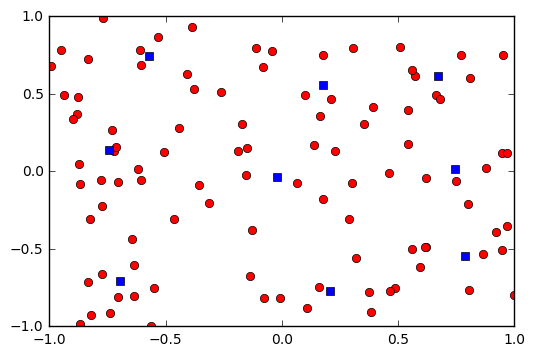

Centroids: [array([ 0.1752022 ,  0.55987904]), array([-0.744736  ,  0.13922641]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.57043229,  0.74330029]), array([-0.69645058, -0.70826905])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, False]
Centroids changed in iter:  [True, False, False]
Centroids changed in iter:  [True, False, False, False]
Centroids changed in iter:  [True, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False, False, True]
New_centroids: [array([ 0.14644118,  0.5836564 ]), array([-0.744736  ,  0.13922641]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.7

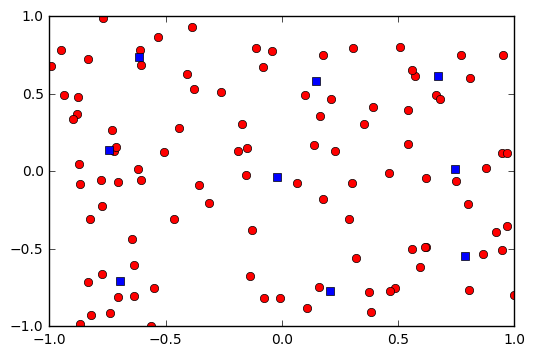

Centroids: [array([ 0.14644118,  0.5836564 ]), array([-0.744736  ,  0.13922641]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.61207086,  0.73835917]), array([-0.69645058, -0.70826905])]
Centroids changed in iter:  []
Centroids changed in iter:  [True]
Centroids changed in iter:  [True, False]
Centroids changed in iter:  [True, False, False]
Centroids changed in iter:  [True, False, False, False]
Centroids changed in iter:  [True, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False, False]
Centroids changed in iter:  [True, False, False, False, False, False, False, True]
New_centroids: [array([ 0.10944204,  0.57722367]), array([-0.744736  ,  0.13922641]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.7

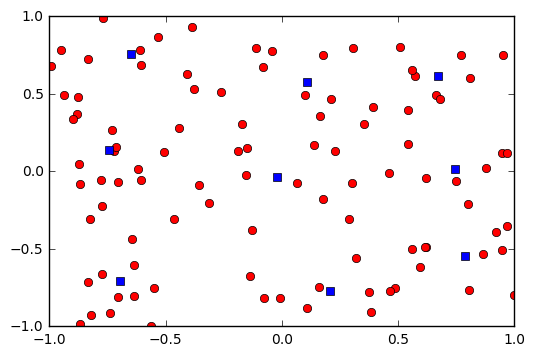

Centroids: [array([ 0.10944204,  0.57722367]), array([-0.744736  ,  0.13922641]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.64722301,  0.76090544]), array([-0.69645058, -0.70826905])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, True]
Centroids changed in iter:  [False, True, False]
Centroids changed in iter:  [False, True, False, False]
Centroids changed in iter:  [False, True, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False, True]
New_centroids: [array([ 0.10944204,  0.57722367]), array([-0.72158121,  0.08977168]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.

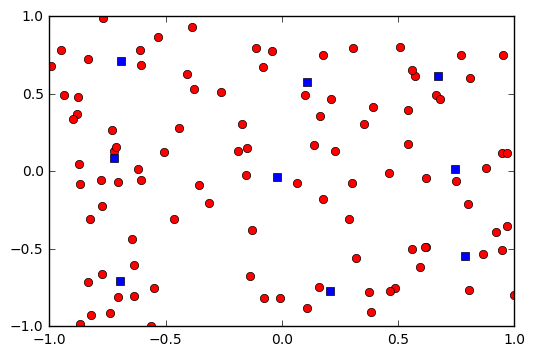

Centroids: [array([ 0.10944204,  0.57722367]), array([-0.72158121,  0.08977168]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.6904891 ,  0.71498946]), array([-0.69645058, -0.70826905])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, True]
Centroids changed in iter:  [False, True, False]
Centroids changed in iter:  [False, True, False, False]
Centroids changed in iter:  [False, True, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False, False]
New_centroids: [array([ 0.10944204,  0.57722367]), array([-0.72843999,  0.063335  ]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0

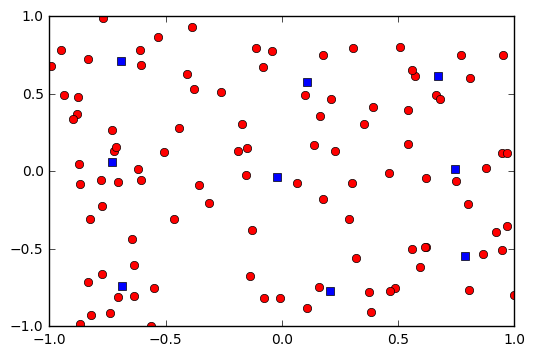

Centroids: [array([ 0.10944204,  0.57722367]), array([-0.72843999,  0.063335  ]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.6904891 ,  0.71498946]), array([-0.68578288, -0.74172658])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, True]
Centroids changed in iter:  [False, True, False]
Centroids changed in iter:  [False, True, False, False]
Centroids changed in iter:  [False, True, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False]
Centroids changed in iter:  [False, True, False, False, False, False, False, False]
New_centroids: [array([ 0.10944204,  0.57722367]), array([-0.71199643,  0.04037078]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0

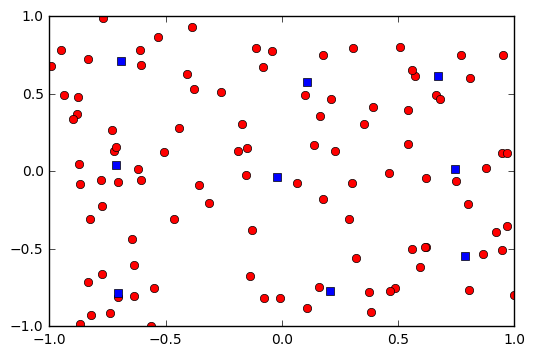

Centroids: [array([ 0.10944204,  0.57722367]), array([-0.71199643,  0.04037078]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), array([ 0.74641972,  0.01412214]), array([-0.02047769, -0.033822  ]), array([ 0.6734862 ,  0.61517546]), array([-0.6904891 ,  0.71498946]), array([-0.70582287, -0.7815115 ])]
Centroids changed in iter:  []
Centroids changed in iter:  [False]
Centroids changed in iter:  [False, False]
Centroids changed in iter:  [False, False, False]
Centroids changed in iter:  [False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False, False, False]
Centroids changed in iter:  [False, False, False, False, False, False, False, False]
New_centroids: [array([ 0.10944204,  0.57722367]), array([-0.71199643,  0.04037078]), array([ 0.78973635, -0.54370166]), array([ 0.20696936, -0.77031389]), ar

([array([ 0.10944204,  0.57722367]),
  array([-0.71199643,  0.04037078]),
  array([ 0.78973635, -0.54370166]),
  array([ 0.20696936, -0.77031389]),
  array([ 0.74641972,  0.01412214]),
  array([-0.02047769, -0.033822  ]),
  array([ 0.6734862 ,  0.61517546]),
  array([-0.6904891 ,  0.71498946]),
  array([-0.70582287, -0.7815115 ])],
 27)

In [34]:
datapoints = generate_dataset(100)
datapoints[:3]
mus = generate_dataset(9)
mus[:3]

lloyds_clustering(datapoints, mus)

In [31]:
bul = np.array([True, True, True])
bul.all() == True

True

In [32]:
bul.any() == False

False